## 1. Business Problem

### business objective

The objective is to forecast the number of international airline passengers for the next five years (beyond 2002) using time series forecasting. This will help the airline company plan for resource allocation, capacity planning, and strategic decision-making.

### constraints

The dataset only includes monthly data from 1995 to 2002.

External factors (e.g., global crises, fuel price hikes, or pandemics) are not included.

The model assumes past patterns and trends will continue into the future.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Load the Dataset
df = pd.read_excel("Airlines Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
#Convert "month to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace = True)

## Outlier Treatment

In [5]:
# IQR method to detect and replace outliers
Q1 = df['Passengers'].quantile(0.25)
Q3 = df['Passengers'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
median = df['Passengers'].median()

df['Passengers'] = np.where((df['Passengers'] < lower) | (df['Passengers'] > upper),median, df['Passengers'])

## 3. Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Summary statistics
df.describe()


,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


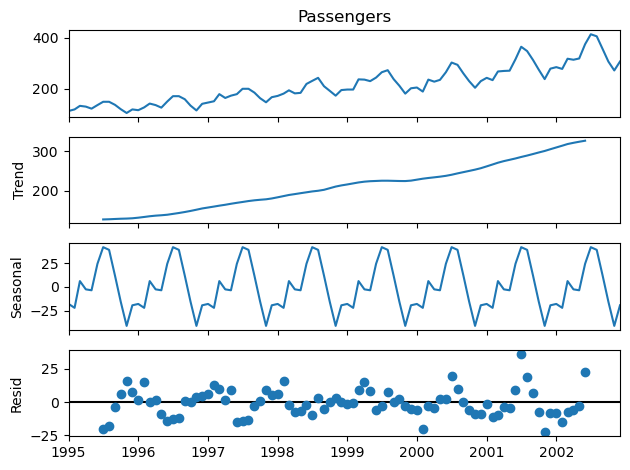

In [8]:
# Decomposition (Trend + Seasonality)
decompose_result = seasonal_decompose(df['Passengers'], model='additive', period=12)
decompose_result.plot()
plt.tight_layout()
plt.show()

# 4. Model Building and Forecasting

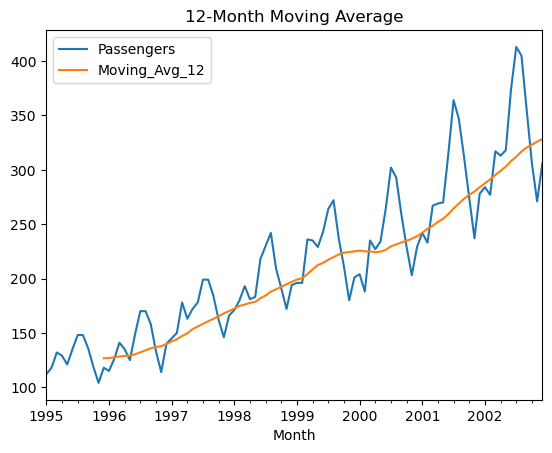

In [9]:
df['Moving_Avg_12'] = df['Passengers'].rolling(window=12).mean()
df[['Passengers', 'Moving_Avg_12']].plot(title='12-Month Moving Average')
plt.show()


### 4.2 Exponential Smoothing

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

exp_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12)
exp_fit = exp_model.fit()
df['Exp_Smoothing'] = exp_fit.fittedvalues

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
# RMSE
rmse_exp = np.sqrt(mean_squared_error(df['Passengers'], df['Exp_Smoothing']))
print("RMSE - Exponential Smoothing:", rmse_exp)

RMSE - Exponential Smoothing: 10.086732380483395


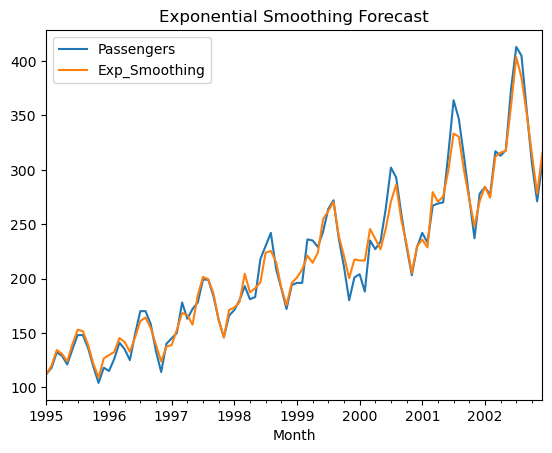

In [12]:
# Plot
df[['Passengers', 'Exp_Smoothing']].plot(title='Exponential Smoothing Forecast')
plt.show()

### 4.3 ARIMA Model

In [13]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Passengers'], order=(1,1,1))
arima_fit = arima_model.fit()
df['ARIMA_Forecast'] = arima_fit.predict(start=1, end=len(df), typ='levels')

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [14]:
# RMSE
rmse_arima = np.sqrt(mean_squared_error(df['Passengers'][1:], df['ARIMA_Forecast'][1:]))
print("RMSE - ARIMA:", rmse_arima)

RMSE - ARIMA: 21.72089704214375


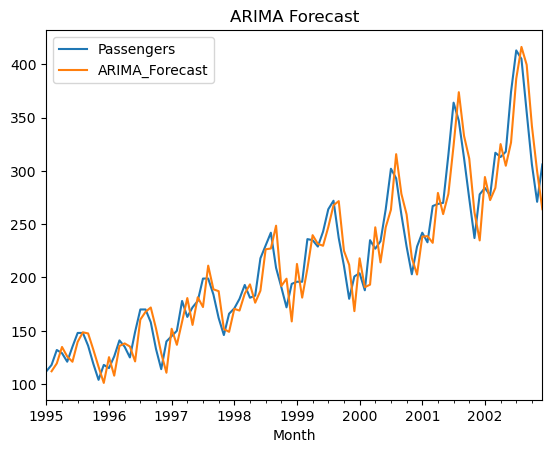

In [15]:
# Plot
df[['Passengers', 'ARIMA_Forecast']].plot(title='ARIMA Forecast')
plt.show()

## 5. Business Impact of the Solution

The time series forecasting models allow the airline to anticipate passenger numbers over the next five years. This aids in:

Capacity planning (number of flights, seats, staff),

Revenue estimation,

Strategic marketing and pricing,

And resource optimization, minimizing costs and maximizing customer satisfaction.

